In [2]:
import pandas as pd
from  sympy import *
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import scipy

In [3]:
df1 = pd.read_csv(r'ex1data1.txt',sep=",", header = None)
df2 = pd.read_csv(r'ex1data2.txt',sep=",", header = None)

In [4]:
df1.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df1.shape

(97, 2)

No handles with labels found to put in legend.


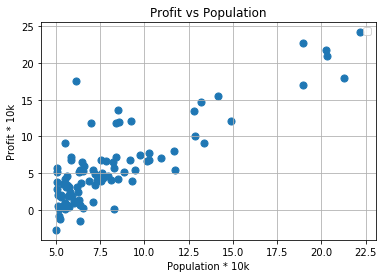

In [6]:
x1= df1[df1.columns[0]]
x2= df1[df1.columns[1]]
fig, ax = plt.subplots()
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
#cols=pltcolor(df1[df1.columns[2]])

plt.scatter(x=x1,y=x2,s=50) #Pass on the list created by the function here

ax.set_title('Profit vs Population')

ax.set_ylabel('Profit * 10k')
ax.set_xlabel('Population * 10k')
ax.legend()


plt.grid(True)
plt.show()

In [7]:
# Gradient Descent

alpha = 0.005
m = len(x1)

theta1 = 0 # Initializatio 
theta0 = 0 # Initialization
xs = np.asarray(x1)
ys = np.asarray(x2)

# YOu might consider rescaling your inputs

i= 0 
count =1
plotx =[]
ploty = []
while i < 600000:
    
    result0 = theta0 - np.sum(theta0+theta1*xs-ys) * alpha/m
    result1 = theta1 - np.sum(np.multiply((theta0+theta1*xs)-ys,xs)) * alpha/m
    theta0 = result0 
    theta1 = result1 
    i+=1
    plotx.append(count)
    ploty.append(np.sum(np.multiply((theta0+theta1*xs)-ys,xs)))
    
    count +=1
    
print(theta0, theta1)

-3.8957808783116024 1.1930336441895681


In [8]:
x1 = np.asarray(x1)

In [9]:
x1 = x1[:, np.newaxis]

In [10]:
# using cvxpy
import cvxpy as cp

X = np.hstack((np.ones((x1.shape[0],1)), x1))
y = np.asarray(x2)
thetas = cp.Variable(X.shape[1])

cost = cp.sum_squares(X @ thetas - y)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

868.5324469391848

In [11]:
cost

Expression(CONVEX, NONNEGATIVE, ())

In [12]:
thetas.value

array([-3.89578088,  1.19303364])

In [12]:
# Scipy

X = np.hstack((np.ones((x1.shape[0],1)), x1))
y = x2

m = x1.shape[0]

def cost_function(thetas, X,y, m):
    
    product = np.matmul(X,thetas)
        
    return 1/(2*m)*((product - y)**2).sum() 

thetas0 = np.zeros((2,1))

sol = scipy.optimize.minimize(cost_function, thetas0, args = (X, y, m), method = 'powell' )

In [13]:
thetas =  sol.x 
print(thetas)

[-3.89578087  1.19303364]


In [14]:
#plt.plot(plotx,ploty);

In [ ]:
x1= df1[df1.columns[0]]
x2= df1[df1.columns[1]]
fig, ax = plt.subplots()
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above


plt.scatter(x=x1,y=x2,s=50) #Pass on the list created by the function here

ax.set_title('Pass/Fail Given Exam Grades')

ax.set_ylabel('Exam2')
ax.set_xlabel('Exam 1')
ax.legend()

x1s = np.asarray(list(range(0,25)))
x2s = ((np.multiply(x1s, thetas[1]) +  thetas[0]))

plt.plot(x1s,x2s)
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

X = xs
y = ys
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

# Multiple Variables

In [ ]:
df2.head()

In [ ]:
df2.shape
X1 = df2[df2.columns[0]]/df2[df2.columns[0]].mean()
X2 = df2[df2.columns[1]]/df2[df2.columns[1]].mean()

In [ ]:
y = np.asarray(df2[df2.columns[2]])
X = np.asarray([np.ones(len(y)),X1,X2]).T

In [ ]:
# Normal Equation
Xt = X.T
final = np.matmul(np.matmul(np.linalg.inv(np.matmul(Xt,X)),Xt),y)
print(final)

In [ ]:
(final[0] + final[1]*1650/df2[df2.columns[0]].mean() + final[2]*3 /df2[df2.columns[1]].mean() )

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()